In [77]:
# Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importação e tratamento dos dados

In [3]:
# Dados do Atlas da Notícia

desertos = pd.read_csv(r"C:\Users\Diogo\Downloads\csv.csv")
desertos['id_municipio'] = desertos['Cód Mun. (IBGE)']

In [5]:
desertos.count()

Unnamed: 0              2708
Cód Mun. (IBGE)         2708
Município               2708
UF                      2708
Região                  2708
População               2708
Ano (população IBGE)    2708
IDHM                    2705
IDHM (Renda)            2705
IDHM (Educação)         2705
id_municipio            2708
dtype: int64

In [7]:
#dados da RAIS

ratier = pd.read_csv(r"C:\Users\Diogo\Downloads\ratier.csv", sep=';')

In [9]:
#merge com nome de municipios
municipios = pd.read_csv(r"C:\Users\Diogo\Downloads\Lista_Municípios_com_IBGE_Brasil_Versao_CSV.csv", sep=';', encoding='latin1')
municipios['id_municipio'] = municipios['IBGE7']
municipios = municipios.drop(columns=['Capital', 'IBGE', 'IBGE7', 'ConcatUF+Mun'])
ratier = pd.merge(ratier, municipios, on='id_municipio')

In [11]:
municipios.to_csv(r'municipios.csv')

In [13]:
# Calculando a diferença salarial entre capital e interior

sal_int = ratier.loc[ratier['ano'] == 2022]
sal_int = sal_int.loc[(sal_int['Porte'] != 'Grande')]
sal_int['valor_remuneracao_media_sm'].mean()

5.10911083561933

In [15]:
ratier = ratier.loc[(ratier.cbo_2002 != 261110) & (ratier.cbo_2002 != 261105) & (ratier.cbo_2002 != 261140)]

In [17]:
ratier.head()

,Unnamed: 0,sexo,id_municipio,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo,motivo_desligamento,tamanho_estabelecimento,grau_instrucao_1985_2005,grau_instrucao_apos_2005,UF,Município,Região,População 2010,Porte
0,0,1,1600303.0,1985,8.7,NaN,6.59,NaN,NaN,1.0,NaN,5,4.0,NaN,AP,Macapá,Região Norte,398204.0,Grande
1,1,1,1200401.0,1985,1.8,NaN,3.12,NaN,NaN,1.0,NaN,5,5.0,NaN,AC,Rio Branco,Região Norte,336038.0,Grande
2,2,1,1200401.0,1985,1.1,NaN,4.14,NaN,NaN,1.0,4.0,5,6.0,NaN,AC,Rio Branco,Região Norte,336038.0,Grande
3,3,1,1200401.0,1985,0.0,NaN,2.61,NaN,NaN,1.0,NaN,4,9.0,NaN,AC,Rio Branco,Região Norte,336038.0,Grande
4,4,1,1400100.0,1985,9.9,NaN,5.32,NaN,NaN,1.0,NaN,5,4.0,NaN,RR,Boa Vista,Região Norte,284313.0,Grande


### Total de jornalistas por município

In [19]:
contagem = ratier.groupby(['ano', 'Município']).size().reset_index(name='contagem')
contagem.head()

,ano,Município,contagem
0,1985,Abaeté,2
1,1985,Acaraú,1
2,1985,Adamantina,2
3,1985,Agudos,1
4,1985,Alegrete,3


In [21]:
numero_jors = pd.merge(contagem, municipios, on=['Município'])

In [23]:
numero_jors.count()

ano               33846
Município         33846
contagem          33846
UF                33846
Região            33846
População 2010    33846
Porte             33846
id_municipio      33846
dtype: int64

In [25]:
# Montar dataset com todas as cidades (inclusive as que nunca possuíram jornalistas registrados)

df22 = numero_jors.loc[(numero_jors['ano'] == 2022)]

cidades_com_contagem = pd.merge(municipios, df22, on=['id_municipio'], how='left')

# Preencher os valores ausentes na coluna de contagem com zero
cidades_com_contagem['contagem'] = cidades_com_contagem['contagem'].fillna(0)

cidades_com_contagem.count()

UF_x                5570
Município_x         5570
Região_x            5570
População 2010_x    5565
Porte_x             5570
id_municipio        5570
ano                 1250
Município_y         1250
contagem            5570
UF_y                1250
Região_y            1250
População 2010_y    1250
Porte_y             1250
dtype: int64

In [27]:
cidades_com_contagem.to_csv(r'mapa1.csv')

In [29]:
# Criar dataset só com os dados de 2022

numero_jors.loc[(numero_jors['ano'] == 2022)].to_csv(r'numero_jors_1.csv')

In [31]:
numero_jors = contagem.pivot_table(index='ano', columns='Município', values='contagem', fill_value=0)

In [33]:
totais = numero_jors.sum()

# Adicionar uma coluna para o ano com o valor 'Total'
totais['ano'] = 'Total'

# Converter a série para um DataFrame e adicionar ao DataFrame original
df_totais = pd.DataFrame(totais).T

# Concatenar o DataFrame original com a linha de totais
numero_jors = pd.concat([numero_jors, df_totais], ignore_index=True)

numero_jors.tail()

Município,Abadia Dos Dourados,Abadia de Goiás,Abadiânia,Abaetetuba,Abaeté,Abaíra,Abdon Batista,Abelardo Luz,Abre Campo,Abreu e Lima,...,Águas Formosas,Águas Lindas de Goiás,Águas de Chapecó,Águas de Lindóia,Águas de São Pedro,Águia Branca,Álvares Machado,Álvaro de Carvalho,Óbidos,ano
34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN
36,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN
37,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN
38,1.0,9.0,20.0,18.0,26.0,1.0,1.0,53.0,1.0,11.0,...,1.0,5.0,7.0,15.0,9.0,3.0,31.0,21.0,3.0,Total


In [35]:
numero_jors.to_excel('numero_jors.xlsx')

## Encontrar quais municipios não tem jornalistas

In [37]:
# Encontrar os municípios que estão em df_todos, mas não em df_alguns
municipios_alguns = set(contagem['Município'])
municipios_todos = set(municipios['Município'])

In [39]:
municipios_faltando = municipios_todos.difference(municipios_alguns)

In [41]:
nao_tem = pd.DataFrame(municipios_faltando, columns=['Município'])
nao_tem = pd.merge(nao_tem, municipios, on='Município')

In [43]:
nao_tem.to_excel('naotem.xlsx')
nao_tem.head()

,Município,UF,Região,População 2010,Porte,id_municipio
0,Vila Lângaro,RS,Região Sul,2152.0,Pequeno I,4323358
1,Marques de Souza,RS,Região Sul,4068.0,Pequeno I,4312054
2,Morro do Chapéu do Piauí,PI,Região Nordeste,6499.0,Pequeno I,2206670
3,Iretama,PR,Região Sul,10622.0,Pequeno I,4110805
4,Ipê,RS,Região Sul,6016.0,Pequeno I,4310439


In [45]:
nao_tem.count()

Município         2927
UF                2927
Região            2927
População 2010    2922
Porte             2927
id_municipio      2927
dtype: int64

### Ver quais municípios sem jornalistas são desertos de notícias

In [47]:
#merge com nome de municipios

atlas = pd.merge(nao_tem, desertos, on='id_municipio')

In [49]:
atlas.describe()

,População 2010,id_municipio,Unnamed: 0,Cód Mun. (IBGE),População,Ano (população IBGE),IDHM,IDHM (Renda),IDHM (Educação)
count,1965.000000,1.968000e+03,1968.000000,1.968000e+03,1968.000000,1968.0,1965.000000,1965.000000,1965.000000
mean,7430.321120,3.151934e+06,1378.855183,3.151934e+06,7546.584350,2022.0,0.638929,0.619236,0.535389
std,5997.466046,9.219697e+05,790.873832,9.219697e+05,6324.086979,0.0,0.069655,0.076835,0.091738
min,805.000000,1.100031e+06,1.000000,1.100031e+06,907.000000,2022.0,0.418000,0.400000,0.207000
25%,3507.000000,2.414196e+06,689.750000,2.414196e+06,3420.500000,2022.0,0.582000,0.554000,0.468000
50%,5522.000000,3.127379e+06,1410.500000,3.127379e+06,5516.500000,2022.0,0.638000,0.619000,0.531000
75%,9560.000000,3.555554e+06,2061.500000,3.555554e+06,9740.750000,2022.0,0.699000,0.682000,0.604000
max,59466.000000,5.222302e+06,2708.000000,5.222302e+06,73019.000000,2022.0,0.795000,0.840000,0.773000


In [63]:
# Selecionando a linha 37
row_37 = numero_jors.loc[37]

# Encontrando as colunas onde o valor da linha 37 é 0
columns_with_zero = row_37[row_37 == 0].index.tolist()

df = pd.DataFrame(columns_with_zero, columns=['Município'])

df = pd.merge(df, municipios, on=["Município"])

sem_real = pd.concat([nao_tem, df])

In [65]:
#achando quem não tem jor e não é deserto

municipios_desertos = set(desertos['id_municipio'])
municipios_semjor = set(sem_real['id_municipio'])

In [67]:
semjornaodeserto = municipios_semjor.difference(municipios_desertos)

In [69]:
semjornaodeserto = pd.DataFrame(semjornaodeserto, columns=['id_municipio'])
atlas = pd.merge(semjornaodeserto, municipios, on='id_municipio')

In [71]:
atlas.to_excel('atlas.xlsx')

In [73]:
atlas.count()

id_municipio      1833
UF                1833
Município         1833
Região            1833
População 2010    1831
Porte             1833
dtype: int64

### Média de indicadores trabalhistas

In [115]:
contagem = ratier.select_dtypes(include=[np.number])
contagem['Município'] = ratier['Município']
contagem = contagem.groupby(['ano', 'Município']).mean().reset_index()
contagem.head()

,ano,Município,Unnamed: 0,sexo,id_municipio,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo,motivo_desligamento,tamanho_estabelecimento,grau_instrucao_1985_2005,grau_instrucao_apos_2005,População 2010
0,1985,Abaeté,272730.500000,1.0,3100203.0,1.85,NaN,1.510,NaN,NaN,1.0,NaN,7.000000,5.5,NaN,22690.0
1,1985,Acaraú,59821.000000,2.0,2300200.0,16.50,NaN,0.990,NaN,NaN,1.0,NaN,4.000000,2.0,NaN,57551.0
2,1985,Adamantina,992179.000000,1.0,3500105.0,11.70,NaN,1.365,NaN,NaN,1.0,2.0,4.000000,8.0,NaN,33797.0
3,1985,Agudos,976019.000000,1.0,3500709.0,2.80,NaN,2.710,NaN,NaN,1.0,NaN,4.000000,9.0,NaN,34524.0
4,1985,Alegrete,281386.666667,1.0,4300406.0,6.80,NaN,1.100,NaN,NaN,1.0,NaN,4.666667,6.0,NaN,77653.0


In [117]:
contagem = pd.merge(contagem, municipios, on='id_municipio')

C:\Users\Diogo\AppData\Local\Temp\ipykernel_26088\3675831193.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  contagem = pd.merge(contagem, municipios, on='id_municipio')


In [87]:
contagem.to_excel('ind_mun.xlsx')

### Média de indicadores por estado

In [129]:
contagem = ratier.select_dtypes(include=[np.number])
contagem['UF'] = ratier['UF']
contagem = contagem.groupby(['ano', 'UF']).mean().reset_index()
contagem.head()

,ano,UF,Unnamed: 0,sexo,id_municipio,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo,motivo_desligamento,tamanho_estabelecimento,grau_instrucao_1985_2005,grau_instrucao_apos_2005,População 2010
0,1985,AC,5268.450000,1.250000,1.200401e+06,3.875000,NaN,6.454500,NaN,NaN,1.000000,5.000000,6.400000,7.550000,NaN,3.360380e+05
1,1985,AL,6021.611111,1.222222,2.704109e+06,6.172222,NaN,3.890000,NaN,NaN,1.055556,2.700000,6.240741,8.166667,NaN,8.852837e+05
2,1985,AM,4480.478723,1.755319,1.302603e+06,4.851596,NaN,3.773404,NaN,NaN,1.005319,1.100000,8.696809,4.553191,NaN,1.802014e+06
3,1985,AP,3733.333333,1.000000,1.600303e+06,8.700000,NaN,6.210000,NaN,NaN,1.000000,NaN,5.000000,4.000000,NaN,3.982040e+05
4,1985,BA,85754.870690,1.310345,2.922781e+06,3.351724,NaN,6.903707,NaN,NaN,1.012987,3.030303,6.370690,8.000000,NaN,1.991363e+06


In [121]:
contagem = pd.merge(contagem, municipios, on='id_municipio')
contagem.to_excel('ind_uf.xlsx')

C:\Users\Diogo\AppData\Local\Temp\ipykernel_26088\1690318220.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  contagem = pd.merge(contagem, municipios, on='id_municipio')


### Onde só trabalham assessores

In [131]:
#dados da RAIS

ratier = pd.read_csv(r"C:\Users\Diogo\Downloads\ratier.csv", sep=';')

#merge com nome de municipios
municipios = pd.read_csv(r"C:\Users\Diogo\Downloads\Lista_Municípios_com_IBGE_Brasil_Versao_CSV.csv", sep=';', encoding='latin1')
municipios['id_municipio'] = municipios['IBGE7']
municipios = municipios.drop(columns=['Capital', 'IBGE', 'IBGE7', 'ConcatUF+Mun'])
ratier = pd.merge(ratier, municipios, on='id_municipio')

In [133]:
ass = ratier.groupby(['ano', 'cbo_2002', 'Município']).size().reset_index(name='contagem')
ass.head()

,ano,cbo_2002,Município,contagem
0,2003,261105.0,Alfenas,1
1,2003,261105.0,Aracaju,7
2,2003,261105.0,Araçatuba,1
3,2003,261105.0,Açu,3
4,2003,261105.0,Barra Bonita,5


In [135]:
soass = ass.loc[(ass['cbo_2002'] != 21110) & (ass['contagem'] == 0)]

In [137]:
soass.describe()

,ano,cbo_2002,contagem
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


## Desertos de notícias que não têm jornalistas registrados

In [139]:
#achando quem não tem jor e não é deserto

municipios_desertos = set(desertos['id_municipio'])
municipios_comjor = set(atlas['id_municipio'])

desertodeserto = municipios_desertos.difference(municipios_comjor)

desertodeserto = pd.DataFrame(desertodeserto, columns=['id_municipio'])
desertao = pd.merge(desertodeserto, municipios, on='id_municipio')

In [141]:
desertao.loc[(desertao['Município'] == "Capitólio")]

,id_municipio,UF,Município,Região,População 2010,Porte
2654,3112802,MG,Capitólio,Região Sudeste,8183.0,Pequeno I


## Mapeamento de todos os veículos do país

In [143]:
veiculos = pd.read_csv(r"C:\Users\Diogo\Downloads\csv (1).csv")
veiculos['id_municipio'] = veiculos['Cód Mun. (IBGE)']
veiculos.head()

,id,Nome do Veículo,Fonte,Segmento,Município,Cód Mun. (IBGE),UF,Região,Núm. Funcionários,Periodicidade,Ativo,Data de Atualização,Data de Fechamento,id_municipio
0,17305,JORNAL O ALTO ACRE,Atlas da Notícia,impresso,Brasiléia,1200104,AC,Norte,NaN,diária,Ativo,2023-05-05T14:07:32Z,NaN,1200104
1,14030,JURUÁ EM TEMPO,Atlas da Notícia,impresso,Cruzeiro do Sul,1200203,AC,Norte,1 a 5 colaboradores,diária,Ativo,2019-11-25T04:41:23Z,NaN,1200203
2,14068,VOZ DO NORTE,Atlas da Notícia,impresso,Cruzeiro do Sul,1200203,AC,Norte,NaN,diária,Fechado,2019-11-26T00:13:43Z,2018-01,1200203
3,9,PAGINA 20,Atlas da Notícia,impresso,Rio Branco,1200401,AC,Norte,NaN,outra,Ativo,2019-10-22T00:33:45Z,NaN,1200401
4,10,A GAZETA,Atlas da Notícia,impresso,Rio Branco,1200401,AC,Norte,NaN,outra,Ativo,2019-10-22T00:33:45Z,NaN,1200401


In [145]:
veiculos_atlas = pd.merge(atlas, veiculos, on=['id_municipio'])

In [147]:
veiculos_atlas['Segmento'].value_counts()

Segmento
radio        1702
online       1430
impresso      750
televisao     165
Name: count, dtype: int64

In [149]:
radio = veiculos_atlas[veiculos_atlas['Segmento'] == 'radio']
radio = radio['id_municipio'].unique()
len(radio)/atlas.count()

id_municipio      0.643753
UF                0.643753
Município         0.643753
Região            0.643753
População 2010    0.644457
Porte             0.643753
dtype: float64

In [151]:
radio = veiculos_atlas[veiculos_atlas['Segmento'] == 'televisao']
radio = radio['id_municipio'].unique()
len(radio)/atlas.count()

id_municipio      0.074741
UF                0.074741
Município         0.074741
Região            0.074741
População 2010    0.074823
Porte             0.074741
dtype: float64

### Dados sobre MEIs

In [153]:
import os

def read_multiple_csvs(directory_path):
    # Listar todos os arquivos no diretório
    files = os.listdir(directory_path)
    
    # Filtrar apenas os arquivos CSV
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Lista para armazenar DataFrames
    dataframes = []
    
    # Ler cada arquivo CSV e adicioná-lo à lista de DataFrames
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path)
        dataframes.append(df)
    
    # Concatenar todos os DataFrames em um único DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    return combined_df

# Usar a função para ler todos os CSVs em um diretório específico
directory_path = r"C:\Users\Diogo\Downloads\MEI"
combined_df = read_multiple_csvs(directory_path)

# Exibir o DataFrame combinado
print(combined_df)

        MUNICIPIO     CNAE  TOTAL
0      ACRELANDIA  9602502      5
1      ACRELANDIA  9602501     25
2      ACRELANDIA  9529104      1
3      ACRELANDIA  9529102      1
4      ACRELANDIA  9521500      1
...           ...      ...    ...
64552      XAPURI  1096100      1
64553      XAPURI  1091102      1
64554      XAPURI  1091101      1
64555      XAPURI   161003      3
64556      XAPURI   159802      1

[64557 rows x 3 columns]


In [155]:
combined_df = pd.DataFrame(combined_df)

In [157]:
combined_df.head()

,MUNICIPIO,CNAE,TOTAL
0,ACRELANDIA,9602502,5
1,ACRELANDIA,9602501,25
2,ACRELANDIA,9529104,1
3,ACRELANDIA,9529102,1
4,ACRELANDIA,9521500,1


In [159]:
meis = combined_df.loc[(combined_df['CNAE'] == 7420001) | (combined_df['CNAE'] == 5811500) | (combined_df['CNAE'] == 5811300) | (combined_df['CNAE'] == 5811302) | (combined_df['CNAE'] == 8219999) | (combined_df['CNAE'] == 9609299)]

In [161]:
# Selecionando a linha 37
row_37 = numero_jors.loc[37]
row_18 = numero_jors.loc[18]

# Encontrando as colunas onde o valor da linha 37 é 0
zero_37 = row_37[row_37 == 0].index.tolist()


# Encontrando as colunas onde o valor da linha 18 não é 0
zero_18 = row_18[row_18 != 0].index.tolist()

zeraram = set(zero_18).intersection(set(zero_37))

In [163]:
len(zeraram)

160

In [165]:
from unidecode import unidecode

# Função para normalizar (remover acentos e converter para minúsculas)
def normalize_string(s):
    return unidecode(s).lower()

meis['MUNICIPIO'] = meis['MUNICIPIO'].apply(normalize_string)

zeraram = list(zeraram)
zeraram = [normalize_string(cidade) for cidade in zeraram]

C:\Users\Diogo\AppData\Local\Temp\ipykernel_26088\690568987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meis['MUNICIPIO'] = meis['MUNICIPIO'].apply(normalize_string)


In [167]:
temmei = set(zeraram).intersection(set(meis['MUNICIPIO']))

In [169]:
meis['TOTAL'].sum()/ratier.loc[(ratier['ano'] == 2022)].count()

Unnamed: 0                      0.238214
sexo                            0.238214
id_municipio                    0.238214
ano                             0.238214
tempo_emprego                   0.238214
quantidade_horas_contratadas    0.238214
valor_remuneracao_media_sm      0.238214
cbo_2002                        0.238214
idade                           0.238214
tipo_vinculo                    0.238214
motivo_desligamento             0.238214
tamanho_estabelecimento         0.238214
grau_instrucao_1985_2005             inf
grau_instrucao_apos_2005        0.238214
UF                              0.238214
Município                       0.238214
Região                          0.238214
População 2010                  0.238246
Porte                           0.238214
dtype: float64

In [171]:
sem_real['Municipio_2'] = sem_real['Município'].apply(normalize_string)

temmei = set(sem_real['Municipio_2']).intersection(set(meis['MUNICIPIO']))

In [173]:
len(temmei)

15

### Análises variadas

(seção com análises rápidas focadas apenas em levantar dados pontuais para a matéria jornalística)

(array([636., 655., 405., 345., 175., 188., 272., 122.,  86.,  43.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

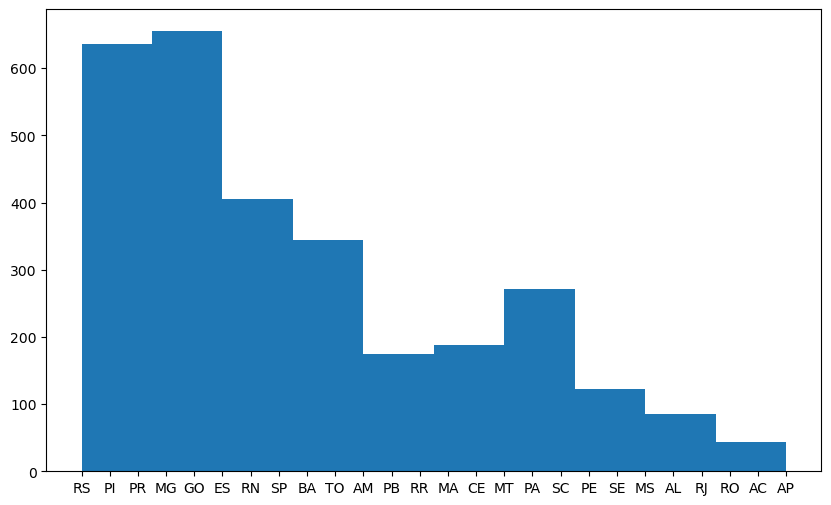

In [176]:
plt.figure(figsize=(10, 6))
plt.hist(nao_tem['UF'])

In [178]:
df = pd.DataFrame(nao_tem['UF'].value_counts())
df1=pd.DataFrame(desertos['UF'].value_counts())
df2=pd.DataFrame(municipios['UF'].value_counts())

In [180]:
df.to_excel('sem.xlsx')
df1.to_excel('deserto.xlsx')
df2.to_excel('total.xlsx')

(array([2.638e+03, 0.000e+00, 0.000e+00, 2.670e+02, 0.000e+00, 0.000e+00,
        2.000e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

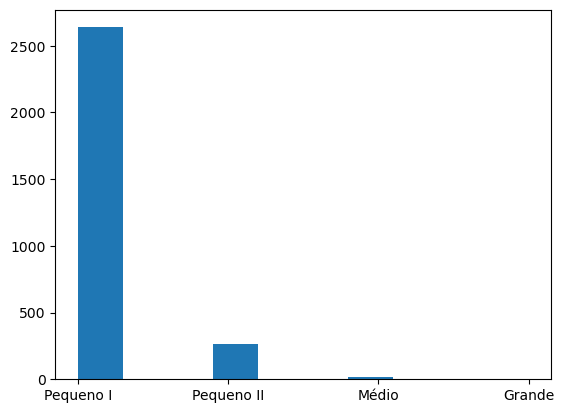

In [182]:
plt.hist(nao_tem['Porte'])

(array([ 189.,    0., 1033.,    0.,    0.,  852.,    0.,  495.,    0.,
         139.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

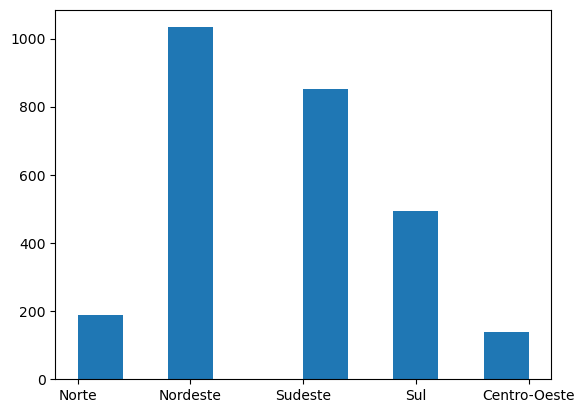

In [184]:
plt.hist(desertos['Região'])

In [186]:
desertos['UF'].value_counts()

UF
MG    494
SP    327
RS    196
BA    175
PR    175
PI    171
PB    143
RN    136
MA    126
SC    124
GO     98
PE     94
TO     77
CE     77
AL     65
PA     52
SE     46
MT     33
ES     27
AM     18
RO     16
RR     10
AC      8
AP      8
MS      8
RJ      4
Name: count, dtype: int64

In [188]:
nao_tem['UF'].value_counts()

UF
MG    503
SP    279
RS    248
BA    244
PR    205
PI    183
GO    152
MA    135
PB    127
SC    117
TO    101
RN     99
PA     90
PE     86
MT     65
CE     53
AL     45
AM     37
SE     36
MS     28
ES     27
RO     20
AC     16
RJ     13
RR     11
AP      7
Name: count, dtype: int64

In [190]:
sem_real['Região'].value_counts()

Região
Região Nordeste        1482
Região Sudeste         1236
Região Sul              865
Região Centro-Oeste     370
Região Norte            367
Name: count, dtype: int64

In [192]:
sem_real['UF'].value_counts()

UF
MG    695
SP    446
RS    357
BA    357
PR    310
GO    211
PI    211
SC    198
PB    192
MA    181
PE    146
RN    141
TO    128
CE    118
PA    113
MT    103
AL     76
SE     60
ES     57
MS     56
AM     49
RJ     38
RO     34
AC     18
RR     13
AP     12
Name: count, dtype: int64

(array([1176.,    0.,    0.,  532.,    0.,    0.,  102.,    0.,    0.,
          23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

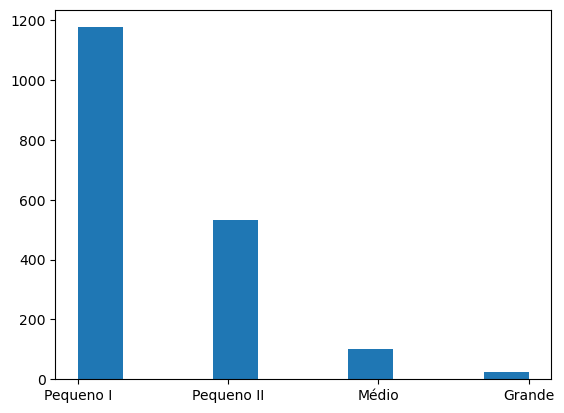

In [194]:
plt.hist(atlas['Porte'])

In [196]:
    atlas.count()

id_municipio      1833
UF                1833
Município         1833
Região            1833
População 2010    1831
Porte             1833
dtype: int64

In [198]:
# Selecionando a linha 37
row_37 = numero_jors.loc[37]

# Encontrando as colunas onde o valor da linha 37 é 0
columns_with_zero = row_37[row_37 == 0].index.tolist()

In [200]:
x = len(columns_with_zero) + nao_tem.count()
x/municipios.count()

Município         0.759425
População 2010    0.759209
Porte             0.759425
Região            0.759425
UF                0.759425
id_municipio      0.759425
dtype: float64

In [202]:
nao_tem['População 2010'].sum()

# nao_tem['População 2010'].sum()/municipios['População 2010'].sum()

28260433.0

In [204]:
municipios.head()

,UF,Município,Região,População 2010,Porte,id_municipio
0,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,1100015
1,RO,Ariquemes,Região Norte,90353.0,Médio,1100023
2,RO,Cabixi,Região Norte,6313.0,Pequeno I,1100031
3,RO,Cacoal,Região Norte,78574.0,Médio,1100049
4,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,1100056


In [206]:
sem_real['População 2010'].sum()/municipios['População 2010'].sum()

0.3025561388044617

In [208]:
nao_tem.count()/sem_real.count()

Municipio_2            NaN
Município         0.677546
População 2010    0.677173
Porte             0.677546
Região            0.677546
UF                0.677546
id_municipio      0.677546
dtype: float64

In [210]:
sem_real['Porte'].value_counts()

Porte
Pequeno I     3498
Pequeno II     689
Médio          110
Grande          23
Name: count, dtype: int64

## Preparação de datasets para plotagem no Flourish

In [212]:
anos = range(1985, 2022)
numero_jors.set = pd.DataFrame(numero_jors, index=anos)

C:\Users\Diogo\AppData\Local\Temp\ipykernel_26088\946354442.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  numero_jors.set = pd.DataFrame(numero_jors, index=anos)


In [214]:
df_long = pd.melt(numero_jors.reset_index(), id_vars=['index'], var_name='Município', value_name='Valor')
df_long.rename(columns={'index': 'Ano'}, inplace=True)

In [216]:
df_long = pd.merge(df_long, municipios, on=['Município'])

In [218]:
df_long.head()

,Ano,Município,Valor,UF,Região,População 2010,Porte,id_municipio
0,0,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104
1,1,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104
2,2,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104
3,3,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104
4,4,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104


In [220]:
df_long.to_csv(r'numero_jors_1.csv')

In [222]:
numero_jors.head()

Município,Abadia Dos Dourados,Abadia de Goiás,Abadiânia,Abaetetuba,Abaeté,Abaíra,Abdon Batista,Abelardo Luz,Abre Campo,Abreu e Lima,...,Águas Formosas,Águas Lindas de Goiás,Águas de Chapecó,Águas de Lindóia,Águas de São Pedro,Águia Branca,Álvares Machado,Álvaro de Carvalho,Óbidos,ano
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


**Unir latitudes e longitudes às bases**

In [224]:
latlon = pd.read_csv(r"C:\Users\Diogo\Downloads\munic_4674 (1)\munic_4674.txt", sep=';')
latlon['id_municipio'] = latlon['GEOCODIGO_MUNICIPIO']

In [226]:
latlon.head()

,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,id_municipio
0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,1100015
1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023
2,1100031,CABIXI,-60.544314,-13.499763,1100031
3,1100049,CACOAL,-61.442944,-11.433865,1100049
4,1100056,CEREJEIRAS,-60.818426,-13.195033,1100056


In [235]:
df_long['id_municipio'] = df_long['id_municipio'].astype(str)
df_long = pd.merge(df_long, latlon, on=['id_municipio'])

In [243]:
df_long.head()

,Ano,Município,Valor,UF,Região,População 2010,Porte,id_municipio,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE
0,0,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104,3100104,ABADIA DOS DOURADOS,-47.396832,-18.487565
1,1,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104,3100104,ABADIA DOS DOURADOS,-47.396832,-18.487565
2,2,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104,3100104,ABADIA DOS DOURADOS,-47.396832,-18.487565
3,3,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104,3100104,ABADIA DOS DOURADOS,-47.396832,-18.487565
4,4,Abadia Dos Dourados,0.0,MG,Região Sudeste,6704.0,Pequeno I,3100104,3100104,ABADIA DOS DOURADOS,-47.396832,-18.487565


In [245]:
df_long['Ano'] = df_long['Ano'] + 1985
df_long['ano2'] = df_long['Ano'] + 1

In [247]:
df_long.to_csv(r'FINAL.csv')

In [249]:
veiculos = pd.read_csv(r"C:\Users\Diogo\Downloads\csv (1).csv")
veiculos['id_municipio'] = veiculos['Cód Mun. (IBGE)']
veiculos = pd.merge(municipios, veiculos, on=['id_municipio'], how='left')

In [251]:
veiculos.to_csv(r'veiculos.csv')

In [253]:
set(municipios['id_municipio']).difference(set(veiculos['id_municipio']))

set()

In [255]:
serie = ratier.groupby(['ano'])

In [257]:
horas = serie['quantidade_horas_contratadas'].mean().reset_index()
salario = serie['valor_remuneracao_media_sm'].mean().reset_index()

In [259]:
salario.to_csv(r'salario.csv')
horas.to_csv(r'horas.csv')

In [261]:
salario['valor_remuneracao_media_sm'] = (salario['valor_remuneracao_media_sm'] - salario['valor_remuneracao_media_sm'].mean())/np.std(salario['valor_remuneracao_media_sm'])
horas['quantidade_horas_contratadas'] = (horas['quantidade_horas_contratadas'] - horas['quantidade_horas_contratadas'].mean())/np.std(horas['quantidade_horas_contratadas'])
slhora = pd.merge(salario, horas, on=['ano'])
slhora = pd.melt(slhora, id_vars=['ano'], var_name='variavel', value_name='Valor')

In [265]:
slhora.to_csv(r'indicadores.csv')

In [273]:
indicadores = pd.read_excel(r"C:\Users\Diogo\Downloads\ind_mun.xlsx")

In [275]:
indicadores['id_municipio'] = indicadores['id_municipio'].astype(str)
indicadores = pd.merge(latlon, indicadores, on=['id_municipio'])

In [277]:
indicadores.to_csv(r'ind.csv')